In [1]:
# Refactored with Helper Functions

import numpy as np
import matplotlib.pyplot as plt


def create_polynomial_matrix(x, degree):
    """
    Create polynomial design matrix of specified degree.
    Returns matrix with columns [1, x, x^2, x^3, ..., x^degree]
    """
    powers = range(degree + 1)
    return np.column_stack([x**i for i in powers])


def fit_polynomial_regression(X_train, y_train):
    """
    Fit polynomial regression using closed form solution.
    Returns coefficients vector.
    """
    return np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train


def predict_polynomial(X, coefs):
    """
    Make predictions using polynomial coefficients.
    """
    return X @ coefs


def compute_rss(y_true, y_pred):
    """
    Compute Residual Sum of Squares.
    """
    return sum((y_pred - y_true) ** 2)


def plot_polynomial_model(
    x_train, y_train, x_test, y_test, coefs, degree, title_suffix="", show_rss=True
):
    """
    Plot polynomial regression model with training and testing data.
    """
    plt.figure(figsize=(10, 6))

    # Plot training and testing data
    plt.scatter(x_train, y_train, color="blue", label="Training Data", s=50)
    plt.scatter(x_test, y_test, color="red", label="Testing Data", s=50)

    # Create smooth x values for the polynomial curve
    x_line = np.linspace(
        min(np.concatenate([x_train, x_test])),
        max(np.concatenate([x_train, x_test])),
        200,
    )

    # Create design matrix for smooth curve
    X_line = create_polynomial_matrix(x_line, degree)
    y_line = predict_polynomial(X_line, coefs)

    # Plot the polynomial
    plt.plot(
        x_line, y_line, color="orange", label=f"Degree {degree} Polynomial", linewidth=2
    )

    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"Degree {degree} Polynomial Regression {title_suffix}")
    plt.legend()
    plt.grid(True)

    if show_rss:
        # Predict on original data for RSS
        X_train_origin = create_polynomial_matrix(x_train, degree)
        X_test_origin = create_polynomial_matrix(x_test, degree)
        y_train_pred = predict_polynomial(X_train_origin, coefs)
        y_test_pred = predict_polynomial(X_test_origin, coefs)

        train_rss = compute_rss(y_train, y_train_pred)
        test_rss = compute_rss(y_test, y_test_pred)

        plt.text(
            0.05,
            0.95,
            f"Train RSS: {train_rss:.4f}\nTest RSS: {test_rss:.4f}",
            transform=plt.gca().transAxes,
            bbox=dict(boxstyle="round", facecolor="white", alpha=0.8),
            verticalalignment="top",
        )

    plt.show()


def print_model_results(coefs, degree, train_rss=None, test_rss=None, model_name=""):
    """
    Print polynomial model coefficients and evaluation metrics.
    """
    print(f"\n{model_name} Degree {degree} Coefficients:")
    for i, coef in enumerate(coefs):
        if i == 0:
            print(f"a{i} (intercept): {coef:.6f}")
        else:
            print(f"a{i} (x^{i}): {coef:.6f}")

    # Build equation string
    equation = f"y = {coefs[0]:.6f}"
    for i in range(1, len(coefs)):
        if coefs[i] >= 0:
            equation += f" + {coefs[i]:.6f}x"
        else:
            equation += f" - {abs(coefs[i]):.6f}x"
        if i > 1:
            equation += f"^{i}"

    print(f"\nDegree {degree} Model: {equation}")

    if train_rss is not None:
        print(f"Training RSS: {train_rss:.4f}")
    if test_rss is not None:
        print(f"Testing RSS: {test_rss:.4f}")


# Data setup
x_training_set = np.array([0.96, 2, 3.3, 4.36, 6.01, 6.3, 6.82, 8.05, 9.51, 10])
y_training_set = np.array([3.45, 2.05, 1.95, 1.71, 1.13, 1.46, 1.07, 1.5, 1.23, 3.09])
x_testing_set = np.array([2.13, 3.48, 3.82, 5.38, 5.68, 6.06, 6.91, 7.55, 8.96, 9])
y_testing_set = np.array([2.68, 1.61, 1.83, 1.32, 1.44, 1.68, 1.75, 1.5, 1.93, 2.2])

LINEAR REGRESSION (DEGREE 1)

Linear Degree 1 Coefficients:
a0 (intercept): 2.380432
a1 (x^1): -0.090112

Degree 1 Model: y = 2.380432 - 0.090112x
Training RSS: 5.2694
Testing RSS: 1.5968


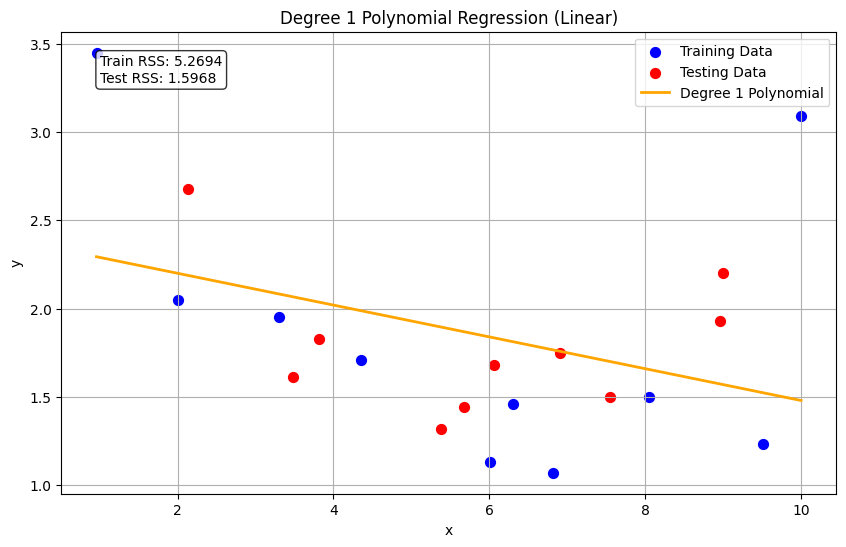

In [2]:
# Linear Regression (Degree 1) - Using Helper Functions
print("=" * 60)
print("LINEAR REGRESSION (DEGREE 1)")
print("=" * 60)

# Create design matrices
X_train_lin = create_polynomial_matrix(x_training_set, 1)
X_test_lin = create_polynomial_matrix(x_testing_set, 1)

# Fit model
lin_coefs = fit_polynomial_regression(X_train_lin, y_training_set)

a0, a1 = lin_coefs

# Make predictions
y_train_lin_pred = predict_polynomial(X_train_lin, lin_coefs)
y_test_lin_pred = predict_polynomial(X_test_lin, lin_coefs)

# Evaluate
train_lin_rss = compute_rss(y_training_set, y_train_lin_pred)
test_lin_rss = compute_rss(y_testing_set, y_test_lin_pred)

# Print results
print_model_results(lin_coefs, 1, train_lin_rss, test_lin_rss, "Linear")

# Plot model
plot_polynomial_model(
    x_training_set,
    y_training_set,
    x_testing_set,
    y_testing_set,
    lin_coefs,
    1,
    title_suffix="(Linear)",
)

QUADRATIC REGRESSION (DEGREE 2)

Quadratic Degree 2 Coefficients:
a0 (intercept): 4.097432
a1 (x^1): -0.944176
a2 (x^2): 0.077055

Degree 2 Model: y = 4.097432 - 0.944176x + 0.077055x^2
Training RSS: 1.7056
Testing RSS: 0.8093


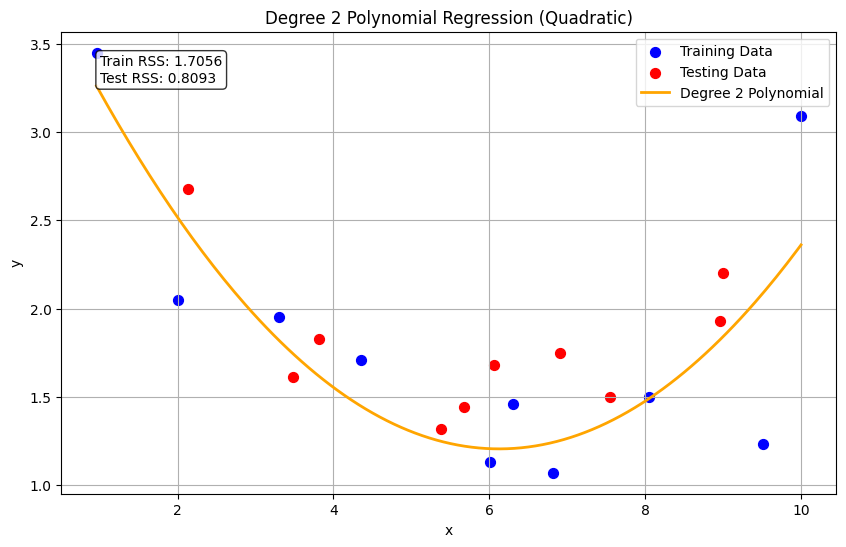

In [3]:
# Quadratic Regression (Degree 2) - Using Helper Functions
print("=" * 60)
print("QUADRATIC REGRESSION (DEGREE 2)")
print("=" * 60)

# Create design matrices
X_train_quad = create_polynomial_matrix(x_training_set, 2)
X_test_quad = create_polynomial_matrix(x_testing_set, 2)

# Fit model
quad_coefs = fit_polynomial_regression(X_train_quad, y_training_set)

# Make predictions
y_train_quad_pred = predict_polynomial(X_train_quad, quad_coefs)
y_test_quad_pred = predict_polynomial(X_test_quad, quad_coefs)

# Evaluate
train_quad_rss = compute_rss(y_training_set, y_train_quad_pred)
test_quad_rss = compute_rss(y_testing_set, y_test_quad_pred)

# Print results
print_model_results(quad_coefs, 2, train_quad_rss, test_quad_rss, "Quadratic")

# Plot model
plot_polynomial_model(
    x_training_set,
    y_training_set,
    x_testing_set,
    y_testing_set,
    quad_coefs,
    2,
    title_suffix="(Quadratic)",
)

4TH-ORDER POLYNOMIAL REGRESSION (DEGREE 4)
Design matrix shape: (10, 5) (10 x 5)

4th-Order Degree 4 Coefficients:
a0 (intercept): 5.933850
a1 (x^1): -3.558219
a2 (x^2): 1.113818
a3 (x^3): -0.150519
a4 (x^4): 0.007152

Degree 4 Model: y = 5.933850 - 3.558219x + 1.113818x^2 - 0.150519x^3 + 0.007152x^4
Training RSS: 0.9789
Testing RSS: 2.2363


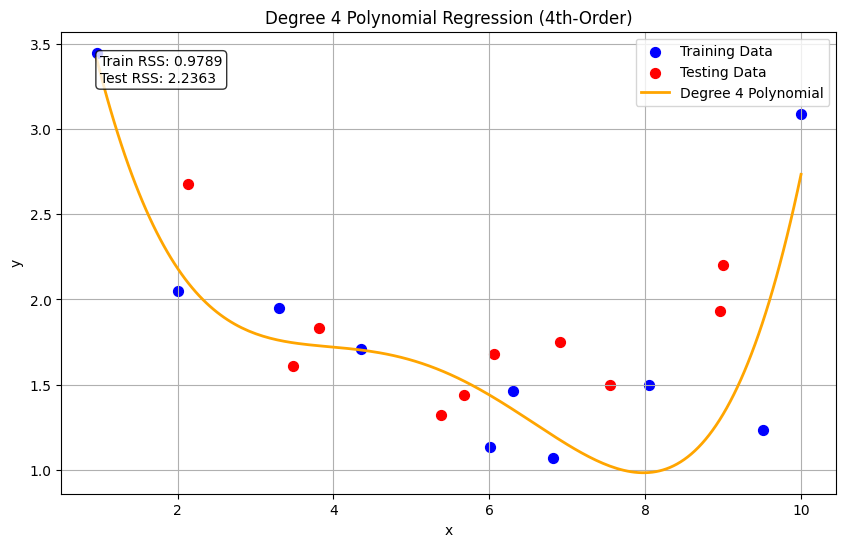

In [4]:
# 4th-Order Polynomial Regression (Degree 4) - Using Helper Functions
print("=" * 60)
print("4TH-ORDER POLYNOMIAL REGRESSION (DEGREE 4)")
print("=" * 60)

# Create design matrices
X_train_4th = create_polynomial_matrix(x_training_set, 4)
X_test_4th = create_polynomial_matrix(x_testing_set, 4)

# Verify matrix dimensions
print(f"Design matrix shape: {X_train_4th.shape} (10 x 5)")

# Fit model
poly4_coefs = fit_polynomial_regression(X_train_4th, y_training_set)

# Make predictions
y_train_4th_pred = predict_polynomial(X_train_4th, poly4_coefs)
y_test_4th_pred = predict_polynomial(X_test_4th, poly4_coefs)

# Evaluate
train_4th_rss = compute_rss(y_training_set, y_train_4th_pred)
test_4th_rss = compute_rss(y_testing_set, y_test_4th_pred)

# Print results
print_model_results(poly4_coefs, 4, train_4th_rss, test_4th_rss, "4th-Order")

# Plot model
plot_polynomial_model(
    x_training_set,
    y_training_set,
    x_testing_set,
    y_testing_set,
    poly4_coefs,
    4,
    title_suffix="(4th-Order)",
)

LOGISTIC REGRESSION WITH COMPLETE EVALUATION METRICS
Training set shapes:
x_train: (6, 3)
y_train: (6, 1)
Converged in 4700 steps
Optimal parameters: [ -1.78672104  13.47217837 -10.24438724]

TRAIN SET PERFORMANCE
Accuracy:  1.0000
Precision: 1.0000
Recall:    1.0000
F1-Score:  1.0000
          TP: 3, TN: 3, FP: 0, FN: 0

TEST SET PERFORMANCE
Accuracy:  1.0000
Precision: 1.0000
Recall:    1.0000
F1-Score:  1.0000
          TP: 3, TN: 3, FP: 0, FN: 0
Train Loss: 0.0049
Test Loss:  0.0031


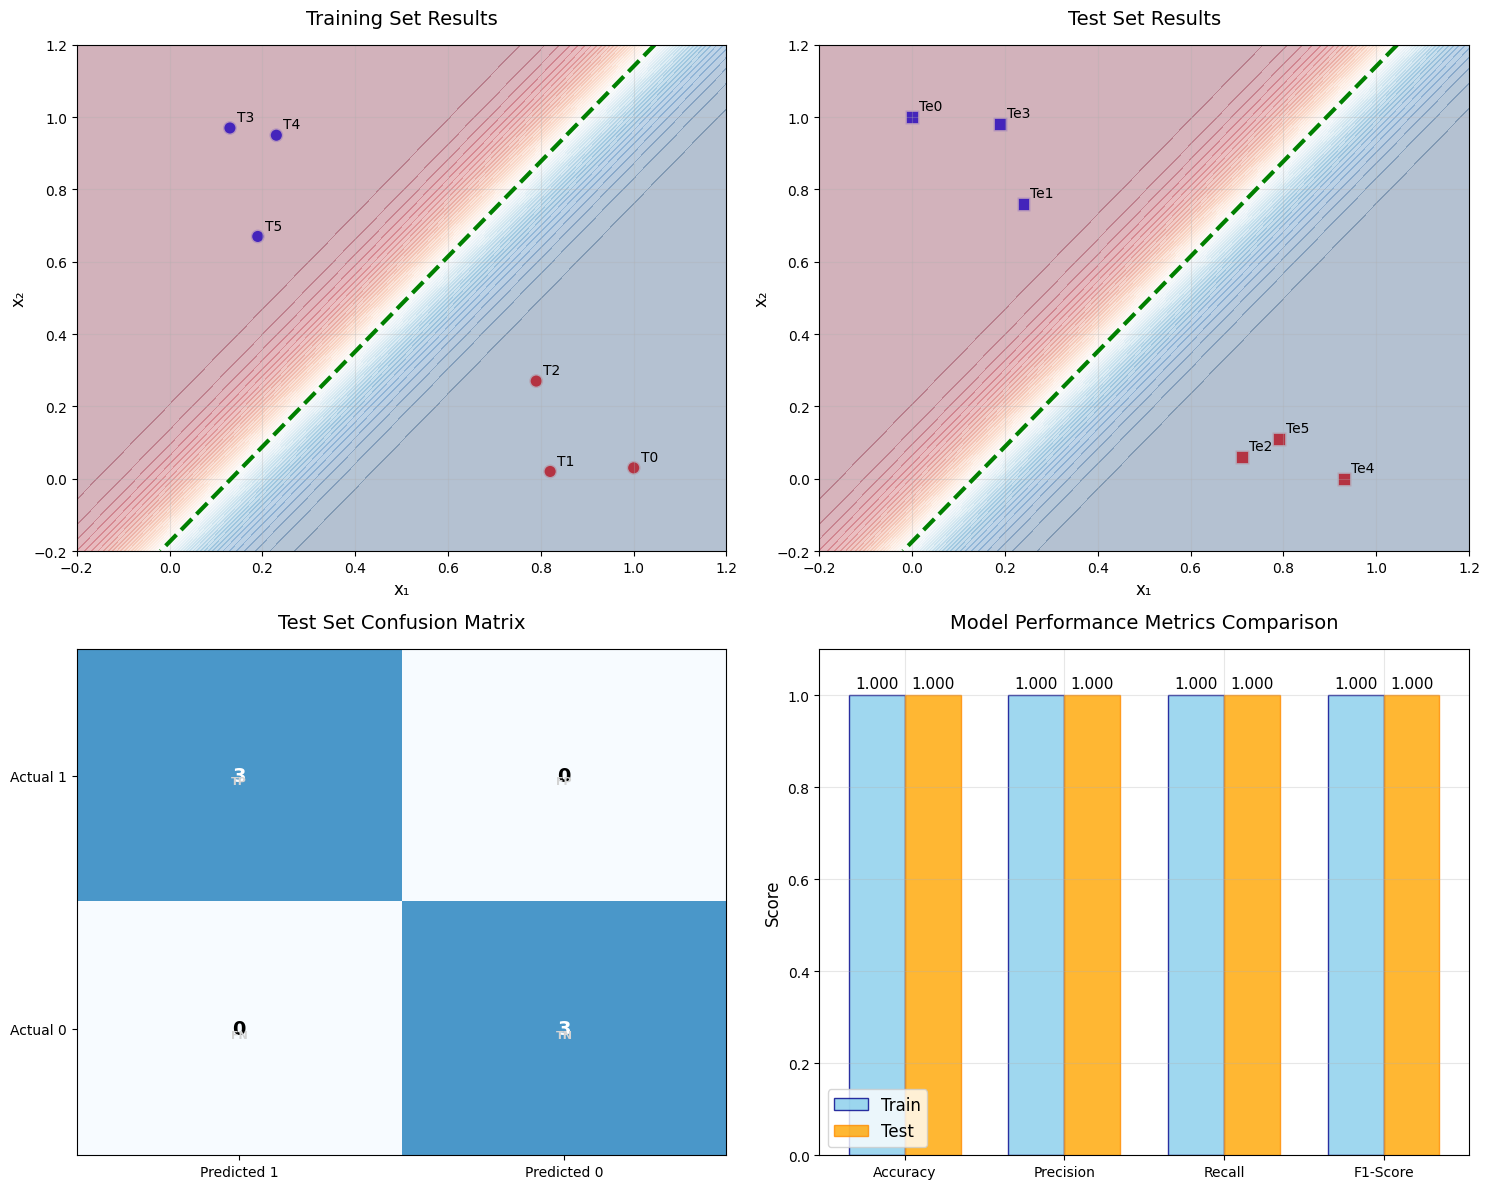


SUMMARY REPORT
Logistic regression model successfully trained and evaluated.
Decision boundary: θ₀ + θ₁x₁ + θ₂x₂ = 0
Parameters: θ₀=-1.7867, θ₁=13.4722, θ₂=-10.2444
Equation: x₂ = -0.1744 + 1.3151x₁

All evaluation metrics calculated:
- Accuracy: Overall correctness rate
- Precision: Positive prediction accuracy
- Recall: True positive rate (sensitivity)
- F1-Score: Harmonic mean of precision and recall


In [5]:
# Q3 Logistic Regression with Evaluation Metrics
print("=" * 60)
print("LOGISTIC REGRESSION WITH COMPLETE EVALUATION METRICS")
print("=" * 60)


def sigmoid(z):
    """
    Sigmoid function for linear model
    """
    z = np.clip(z, -500, 500)  # Prevent overflow
    return 1.0 / (1.0 + np.exp(-z))


def prob(X, Theta):
    """
    Probability P(Y=1|X), parameterized by Theta
    """
    return sigmoid(X @ Theta)


def ce_loss(X, Theta, Y_true):
    """
    Cross-entropy loss function
    """
    predictions = prob(X, Theta)
    predictions = np.clip(predictions, 1e-15, 1 - 1e-15)  # Prevent log(0)
    return np.sum(
        -Y_true * np.log(predictions) - (1.0 - Y_true) * np.log(1 - predictions)
    )


def d_ce_loss(X, Theta, Y_true):
    """
    Gradient of cross-entropy loss function
    Output: column vector
    """
    return X.T @ (prob(X, Theta) - Y_true)


def prob2category(prob_ls, threshold=0.5):
    """
    Probability to category
    """
    return (prob_ls >= threshold).astype(int)


def grad_descent(obj_fn, grad_fn, alpha, is_converge, init_theta, max_iters=1000):
    """
    Gradient Descent Algorithm - FIXED
    """
    theta = init_theta.copy()
    prev_loss = np.inf

    for iteration in range(max_iters):
        current_loss = obj_fn(theta)
        if is_converge(prev_loss, current_loss):
            print(f"Converged in {iteration} steps")
            return theta

        gradient = grad_fn(theta)
        theta = theta - alpha * gradient
        prev_loss = current_loss

    print(f"Maximum iterations ({max_iters}) reached")
    return theta


def calculate_metrics(y_true, y_pred):
    """
    Calculate accuracy, precision, recall, and F1-score
    """
    # True positives, true negatives, false positives, false negatives
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))

    # Calculate metrics
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1_score = (
        2 * (precision * recall) / (precision + recall)
        if (precision + recall) > 0
        else 0
    )

    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1_score,
        "tp": tp,
        "tn": tn,
        "fp": fp,
        "fn": fn,
    }


def logistic_regress(X, Y, learning_rate=0.3):
    # Proper initialization with specified initial values
    Theta_0 = np.array([[-1.0], [1.5], [1.5]])

    def converge_criterion(prev, curr):
        return abs(prev - curr) < 1e-6

    def obj_f(Theta):
        return ce_loss(X, Theta, Y)

    def d_obj_f(Theta):
        return d_ce_loss(X, Theta, Y)

    # Use gradient descent to find the best model
    Theta_optim = grad_descent(
        obj_f, d_obj_f, learning_rate, converge_criterion, Theta_0, max_iters=10000
    )
    return Theta_optim


# Data setup
x1_train_raw = np.array([1.00, 0.82, 0.79, 0.13, 0.23, 0.19])
x2_train_raw = np.array([0.03, 0.02, 0.27, 0.97, 0.95, 0.67])
y_train_raw = np.array([1, 1, 1, 0, 0, 0])

x1_test_raw = np.array([0.00, 0.24, 0.71, 0.19, 0.93, 0.79])
x2_test_raw = np.array([1.00, 0.76, 0.06, 0.98, 0.00, 0.11])
y_test_raw = np.array([0, 0, 1, 0, 1, 1])

# Build design matrices with bias term
x_train = np.column_stack((np.ones_like(x1_train_raw), x1_train_raw, x2_train_raw))
x_test = np.column_stack((np.ones_like(x1_test_raw), x1_test_raw, x2_test_raw))

# Convert to column vectors
y_train = y_train_raw.reshape(-1, 1)
y_test = y_test_raw.reshape(-1, 1)

print("Training set shapes:")
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)

# Train the model
Theta_optim = logistic_regress(x_train, y_train, learning_rate=0.3)
print("Optimal parameters:", Theta_optim.flatten())

# Calculate predictions
y_train_pred = prob2category(prob(x_train, Theta_optim))
y_test_pred = prob2category(prob(x_test, Theta_optim))

# Calculate metrics
train_metrics = calculate_metrics(y_train, y_train_pred)
test_metrics = calculate_metrics(y_test, y_test_pred)

# Display metrics
print("\n" + "=" * 60)
print("TRAIN SET PERFORMANCE")
print("=" * 60)
print(f"Accuracy:  {train_metrics['accuracy']:.4f}")
print(f"Precision: {train_metrics['precision']:.4f}")
print(f"Recall:    {train_metrics['recall']:.4f}")
print(f"F1-Score:  {train_metrics['f1_score']:.4f}")
print(
    f"          TP: {train_metrics['tp']}, TN: {train_metrics['tn']}, FP: {train_metrics['fp']}, FN: {train_metrics['fn']}"
)

print("\n" + "=" * 60)
print("TEST SET PERFORMANCE")
print("=" * 60)
print(f"Accuracy:  {test_metrics['accuracy']:.4f}")
print(f"Precision: {test_metrics['precision']:.4f}")
print(f"Recall:    {test_metrics['recall']:.4f}")
print(f"F1-Score:  {test_metrics['f1_score']:.4f}")
print(
    f"          TP: {test_metrics['tp']}, TN: {test_metrics['tn']}, FP: {test_metrics['fp']}, FN: {test_metrics['fn']}"
)

# Additional loss metrics
train_loss = ce_loss(x_train, Theta_optim, y_train)
test_loss = ce_loss(x_test, Theta_optim, y_test)
print(f"Train Loss: {train_loss:.4f}")
print(f"Test Loss:  {test_loss:.4f}")

# Calculate plot boundaries
x_min_ext, x_max_ext = -0.2, 1.2
y_min_ext, y_max_ext = -0.2, 1.2

# Create comprehensive visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Decision boundary with training set
ax1.set_title("Training Set Results", fontsize=14, pad=15)
color_list_train = ["red" if label == 1 else "blue" for label in y_train.flatten()]
ax1.scatter(
    x_train[:, 1],
    x_train[:, 2],
    c=color_list_train,
    s=100,
    edgecolors="white",
    linewidth=2,
    alpha=0.8,
)

# Add labels
for i, label in enumerate(y_train.flatten()):
    ax1.annotate(
        f"T{i}",
        (x_train[i, 1], x_train[i, 2]),
        fontsize=10,
        xytext=(5, 5),
        textcoords="offset points",
    )

# Create mesh grid for decision boundary
xx, yy = np.meshgrid(
    np.linspace(x_min_ext, x_max_ext, 200), np.linspace(y_min_ext, y_max_ext, 200)
)
grid_points = np.c_[np.ones(len(xx.ravel())), xx.ravel(), yy.ravel()]
Z = prob(grid_points, Theta_optim).reshape(xx.shape)

# Add decision boundary and probability contours
contour1 = ax1.contourf(
    xx, yy, Z, levels=50, alpha=0.3, cmap=plt.cm.RdBu, vmin=0, vmax=1
)
ax1.contour(xx, yy, Z, levels=[0.5], colors="green", linewidths=3, linestyles="--")
ax1.set_xlabel("x₁", fontsize=12)
ax1.set_ylabel("x₂", fontsize=12)
ax1.grid(True, alpha=0.3)

# Plot 2: Decision boundary with test set
ax2.set_title("Test Set Results", fontsize=14, pad=15)
color_list_test = ["red" if label == 1 else "blue" for label in y_test.flatten()]
ax2.scatter(
    x_test[:, 1],
    x_test[:, 2],
    c=color_list_test,
    s=100,
    edgecolors="white",
    linewidth=2,
    alpha=0.8,
    marker="s",
)

# Add labels
for i, label in enumerate(y_test.flatten()):
    ax2.annotate(
        f"Te{i}",
        (x_test[i, 1], x_test[i, 2]),
        fontsize=10,
        xytext=(5, 5),
        textcoords="offset points",
    )

ax2.contourf(xx, yy, Z, levels=50, alpha=0.3, cmap=plt.cm.RdBu, vmin=0, vmax=1)
ax2.contour(xx, yy, Z, levels=[0.5], colors="green", linewidths=3, linestyles="--")
ax2.set_xlabel("x₁", fontsize=12)
ax2.set_ylabel("x₂", fontsize=12)
ax2.grid(True, alpha=0.3)

# Plot 3: Confusion matrix heatmap
conf_matrix_test = np.array(
    [[test_metrics["tp"], test_metrics["fp"]], [test_metrics["fn"], test_metrics["tn"]]]
)

im3 = ax3.imshow(
    conf_matrix_test,
    cmap="Blues",
    interpolation="nearest",
    aspect="auto",
    vmin=0,
    vmax=5,
)
ax3.set_title("Test Set Confusion Matrix", fontsize=14, pad=15)
ax3.set_xticks([0, 1])
ax3.set_yticks([0, 1])
ax3.set_xticklabels(["Predicted 1", "Predicted 0"])
ax3.set_yticklabels(["Actual 1", "Actual 0"])

for i in range(2):
    for j in range(2):
        val = conf_matrix_test[i, j]
        ax3.text(
            j,
            i,
            str(val),
            ha="center",
            va="center",
            fontweight="bold",
            fontsize=14,
            color="white" if val > 2.5 else "black",
        )

ax3.text(
    0,
    0,
    "\nTP",
    ha="center",
    va="center",
    fontweight="bold",
    fontsize=8,
    color="lightgray",
)
ax3.text(
    1,
    0,
    "\nFP",
    ha="center",
    va="center",
    fontweight="bold",
    fontsize=8,
    color="lightgray",
)
ax3.text(
    0,
    1,
    "\nFN",
    ha="center",
    va="center",
    fontweight="bold",
    fontsize=8,
    color="lightgray",
)
ax3.text(
    1,
    1,
    "\nTN",
    ha="center",
    va="center",
    fontweight="bold",
    fontsize=8,
    color="lightgray",
)

# Plot 4: Summary metrics bar chart
metrics_names = ["Accuracy", "Precision", "Recall", "F1-Score"]
train_values = [
    train_metrics["accuracy"],
    train_metrics["precision"],
    train_metrics["recall"],
    train_metrics["f1_score"],
]
test_values = [
    test_metrics["accuracy"],
    test_metrics["precision"],
    test_metrics["recall"],
    test_metrics["f1_score"],
]

x_pos = np.arange(len(metrics_names))
width = 0.35

bars1 = ax4.bar(
    x_pos - width / 2,
    train_values,
    width,
    label="Train",
    alpha=0.8,
    color="skyblue",
    edgecolor="darkblue",
)
bars2 = ax4.bar(
    x_pos + width / 2,
    test_values,
    width,
    label="Test",
    alpha=0.8,
    color="orange",
    edgecolor="darkorange",
)

ax4.set_title("Model Performance Metrics Comparison", fontsize=14, pad=15)
ax4.set_ylabel("Score", fontsize=12)
ax4.set_xticks(x_pos)
ax4.set_xticklabels(metrics_names)
ax4.set_ylim(0, 1.1)
ax4.grid(True, alpha=0.3)
ax4.legend(fontsize=12)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax4.text(
            bar.get_x() + bar.get_width() / 2.0,
            height + 0.01,
            f"{height:.3f}",
            ha="center",
            va="bottom",
            fontsize=11,
        )

plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print("SUMMARY REPORT")
print("=" * 60)
print("Logistic regression model successfully trained and evaluated.")
print(f"Decision boundary: θ₀ + θ₁x₁ + θ₂x₂ = 0")
print(
    f"Parameters: θ₀={Theta_optim[0, 0]:.4f}, θ₁={Theta_optim[1, 0]:.4f}, θ₂={Theta_optim[2, 0]:.4f}"
)
print(
    f"Equation: x₂ = {(-Theta_optim[0, 0] / Theta_optim[2, 0]):.4f} + {(-Theta_optim[1, 0] / Theta_optim[2, 0]):.4f}x₁"
)
print("\nAll evaluation metrics calculated:")
print("- Accuracy: Overall correctness rate")
print("- Precision: Positive prediction accuracy")
print("- Recall: True positive rate (sensitivity)")
print("- F1-Score: Harmonic mean of precision and recall")

In [6]:
# One iteration of gradient descent (logistic regression) on the training set

alpha = 0.3  # learning rate consistent with prior training
Theta = np.array([[-1], [1.5], [1.5]])

initial_loss = ce_loss(x_train, Theta, y_train)
grad = d_ce_loss(x_train, Theta, y_train)
Theta_next = Theta - alpha * grad
next_loss = ce_loss(x_train, Theta_next, y_train)

print("Initial Theta:\n", Theta)
print("Gradient at initial Theta:\n", grad)
print("Theta after 1 step:\n", Theta_next)
print(f"Loss: initial={initial_loss:.6f}, after 1 step={next_loss:.6f}")

# Per-sample printout for this epoch using f = -1 + 1.5x₁ + 1.5x₂
print("\nIndex\tx₁\tx₂\ty\tf = -1 + 1.5x₁ + 1.5x₂\tσ(f)\tError = σ(f) - y")
for i, (x1, x2, y_true) in enumerate(
    zip(x_train[:, 1], x_train[:, 2], y_train.flatten())
):
    f = -1 + 1.5 * x1 + 1.5 * x2
    s = sigmoid(f)
    err = s - y_true
    print(f"{i}\t{x1:.2f}\t{x2:.2f}\t{int(y_true)}\t{f:.6f}\t{s:.6f}\t{err:.6f}")

# Summed gradient components per parameter (theta_0, theta_1, theta_2)
err_vec = sigmoid(x_train @ Theta) - y_train
theta0_grad = float(np.sum(err_vec))
theta1_grad = float(np.sum(x_train[:, 1] * err_vec.flatten()))
theta2_grad = float(np.sum(x_train[:, 2] * err_vec.flatten()))

# Use 1-iteration model (Theta_next) to predict test set and evaluate
y_test_prob_1iter = prob(x_test, Theta_next)
y_test_pred_1iter = prob2category(y_test_prob_1iter)
print("probability:", y_test_prob_1iter)
print("predicted class", y_test_pred_1iter)

metrics_1iter_test = calculate_metrics(y_test, y_test_pred_1iter)
print("\nTEST SET EVALUATION (1-iteration model)")
print(f"Accuracy:  {metrics_1iter_test['accuracy']:.4f}")
print(f"Precision: {metrics_1iter_test['precision']:.4f}")
print(f"Recall:    {metrics_1iter_test['recall']:.4f}")

Initial Theta:
 [[-1. ]
 [ 1.5]
 [ 1.5]]
Gradient at initial Theta:
 [[ 0.7535037 ]
 [-0.65446457]
 [ 1.55387297]]
Theta after 1 step:
 [[-1.22605111]
 [ 1.69633937]
 [ 1.03383811]]
Loss: initial=4.539117, after 1 step=3.647883

Index	x₁	x₂	y	f = -1 + 1.5x₁ + 1.5x₂	σ(f)	Error = σ(f) - y
0	1.00	0.03	1	0.545000	0.632975	-0.367025
1	0.82	0.02	1	0.260000	0.564636	-0.435364
2	0.79	0.27	1	0.590000	0.643365	-0.356635
3	0.13	0.97	0	0.650000	0.657010	0.657010
4	0.23	0.95	0	0.770000	0.683521	0.683521
5	0.19	0.67	0	0.290000	0.571996	0.571996
probability: [[0.45209415]
 [0.49169759]
 [0.51009366]
 [0.52732642]
 [0.58699207]
 [0.55669986]]
predicted class [[0]
 [0]
 [1]
 [1]
 [1]
 [1]]

TEST SET EVALUATION (1-iteration model)
Accuracy:  0.8333
Precision: 0.7500
Recall:    1.0000


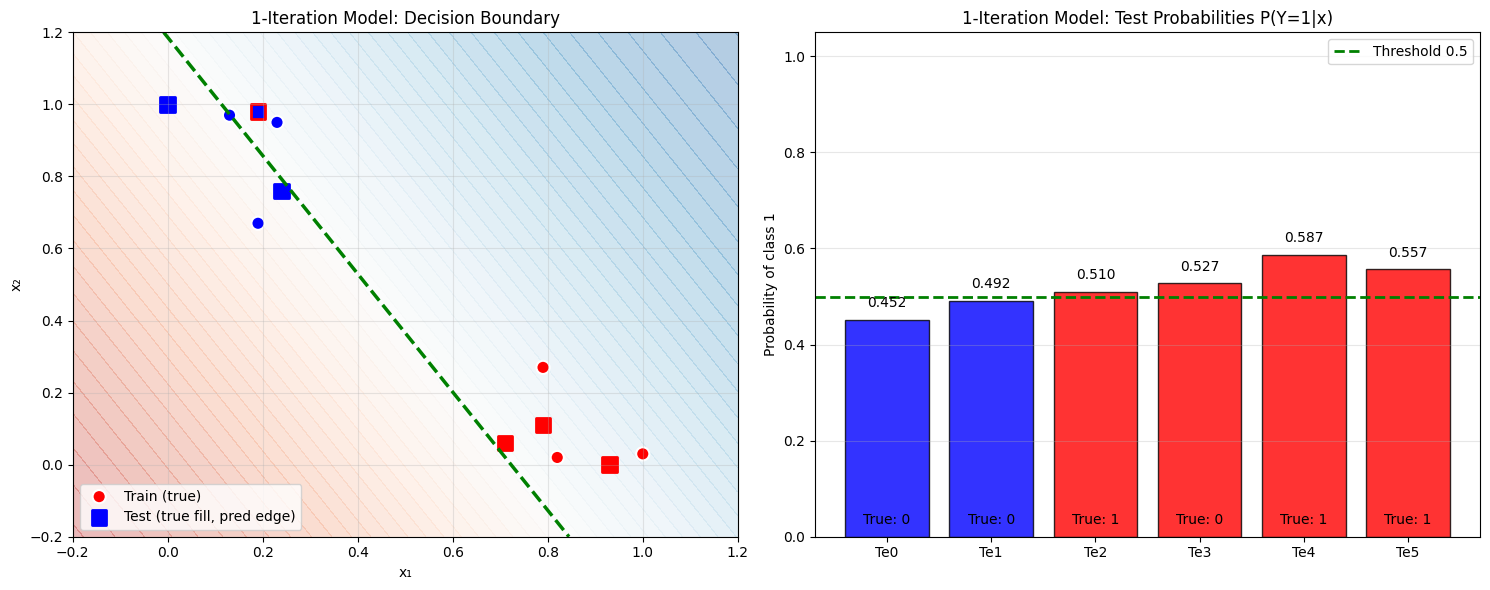

In [7]:
# Visualization for 1-iteration prediction (logistic regression)

# Ensure required variables exist from previous cells:
# - Theta_next, x_train, y_train, x_test, y_test, prob, prob2category

# Compute probabilities and predicted classes on test set if not already present
try:
    y_test_prob_vis = y_test_prob_1iter
    y_test_pred_vis = y_test_pred_1iter
except NameError:
    y_test_prob_vis = prob(x_test, Theta_next)
    y_test_pred_vis = prob2category(y_test_prob_vis)

# Build a mesh grid for decision boundary visualization
x_min_ext, x_max_ext = -0.2, 1.2
y_min_ext, y_max_ext = -0.2, 1.2
xx, yy = np.meshgrid(
    np.linspace(x_min_ext, x_max_ext, 300), np.linspace(y_min_ext, y_max_ext, 300)
)

# Prepare grid with bias term
grid_points = np.c_[np.ones(xx.size), xx.ravel(), yy.ravel()]
Z = prob(grid_points, Theta_next).reshape(xx.shape)

# Colors based on true labels
train_colors = ["red" if v == 1 else "blue" for v in y_train.flatten()]
test_colors_true = ["red" if v == 1 else "blue" for v in y_test.flatten()]
# Edge colors to reflect predicted classes on test set
test_edge_colors_pred = ["red" if v == 1 else "blue" for v in y_test_pred_vis.flatten()]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Left: Decision boundary with train/test points
ax1.set_title("1-Iteration Model: Decision Boundary")
contourf = ax1.contourf(
    xx, yy, Z, levels=50, cmap=plt.cm.RdBu, alpha=0.35, vmin=0, vmax=1
)
ax1.contour(xx, yy, Z, levels=[0.5], colors="green", linewidths=2.5, linestyles="--")

# Training points (circles) colored by true label
ax1.scatter(
    x_train[:, 1],
    x_train[:, 2],
    c=train_colors,
    s=90,
    edgecolors="white",
    linewidth=1.5,
    label="Train (true)",
)

# Test points (squares) fill by true label, edge by predicted label
ax1.scatter(
    x_test[:, 1],
    x_test[:, 2],
    c=test_colors_true,
    s=110,
    marker="s",
    edgecolors=test_edge_colors_pred,
    linewidth=2.0,
    label="Test (true fill, pred edge)",
)

ax1.set_xlabel("x₁")
ax1.set_ylabel("x₂")
ax1.set_xlim(x_min_ext, x_max_ext)
ax1.set_ylim(y_min_ext, y_max_ext)
ax1.grid(True, alpha=0.3)
ax1.legend(loc="lower left")

# Right: Bar chart of test probabilities
ax2.set_title("1-Iteration Model: Test Probabilities P(Y=1|x)")
indices = np.arange(len(y_test_prob_vis))
probs = y_test_prob_vis.flatten()
colors_pred = ["red" if v == 1 else "blue" for v in y_test_pred_vis.flatten()]

bars = ax2.bar(indices, probs, color=colors_pred, alpha=0.8, edgecolor="black")
ax2.axhline(0.5, color="green", linestyle="--", linewidth=2, label="Threshold 0.5")
ax2.set_xticks(indices)
ax2.set_xticklabels([f"Te{i}" for i in indices])
ax2.set_ylim(0, 1.05)
ax2.set_ylabel("Probability of class 1")
ax2.grid(True, axis="y", alpha=0.3)
ax2.legend()

# Annotate bars with true labels and exact probability
for i, (bar, p_true, p_val) in enumerate(zip(bars, y_test.flatten(), probs)):
    ax2.text(
        bar.get_x() + bar.get_width() / 2,
        p_val + 0.02,
        f"{p_val:.3f}",
        ha="center",
        va="bottom",
        fontsize=10,
    )
    ax2.text(
        bar.get_x() + bar.get_width() / 2,
        0.02,
        f"True: {int(p_true)}",
        ha="center",
        va="bottom",
        fontsize=10,
        color="black",
    )

plt.tight_layout()
plt.show()